# ⏺️ Diabete prediction 

*Pavel d'ALMEIDA*

##### contexte et problématique

Cet ensemble de données provient des National Institutes of Diabetes and Digestive and Kidneys.
L'objectif de l'ensemble de données est de prédire diagnostiquement si un patient souffre de diabète,
sur la base de certaines mesures de diagnostic incluses dans l’ensemble de données. Plusieurs contraintes ont été imposées
sur la sélection de ces instances dans une base de données plus large. En particulier, tous les patients ici sont des femmes
avoir au moins 21 ans d'origine indienne Pima.2

À partir de l'ensemble des données du fichier (.csv), nous pouvons trouver plusieurs variables, dont certaines sont indépendantes
(plusieurs variables prédictives médicales) et une seule variable dépendante cible (résultat).

##### Description des variables

**Pregnancies** : Pour exprimer le nombre de grossesses

**Glucose** : Pour exprimer le taux de glucose dans le sang

**BloodPressure** : Pour exprimer la mesure de la pression artérielle

**SkinThickness** : Pour exprimer l’épaisseur de la peau

**Insulin** : Pour exprimer le taux d'insuline dans le sang

**BMI** : Pour exprimer l'indice de masse corporelle

**DiabetesPedigreeFonction** : Pour exprimer le pourcentage de diabète

**Age** : Pour exprimer l'âge

**Outcome** : Pour exprimer le résultat final, 1 est Oui et 0 est Non

--------------------------------

##### Importation des bibliothèques

In [2]:
# importation des bibliothèques

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

##### Importation des données

In [3]:
# importation des données

data = pd.read_csv("./diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Faisons une copie du dataframe data dans une nouvelle variable df que nous allons utiliser pur notre etude

In [4]:
# copie du dataframe pour éviter de modifier les données originales

df = data.copy()

In [5]:
#affichage des informations sur les données

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape

(768, 9)

In [7]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Verifions s'il y a des valeurs manquantes dans notre jeu de données

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

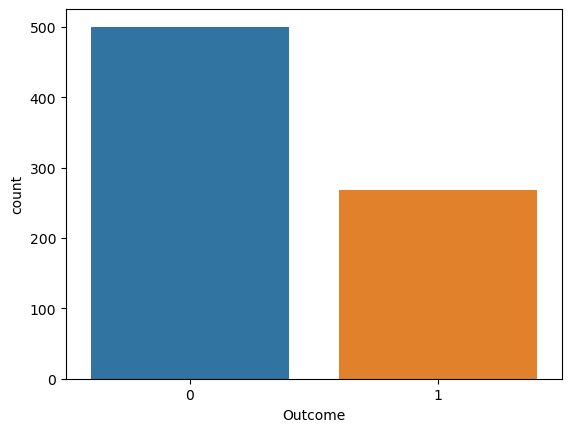

In [9]:
# Countplot

sns.countplot(x="Outcome", data=df)

<Axes: >

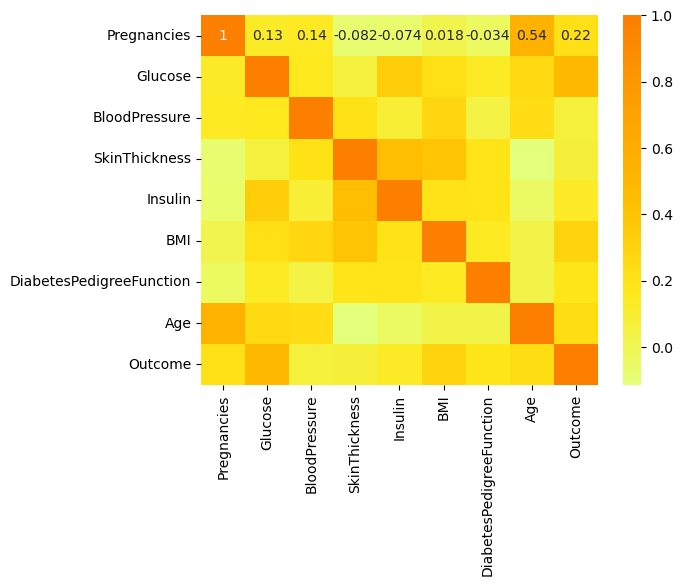

In [10]:
# Making a correlation matrix

correlation = df.corr()
sns.heatmap(correlation, cmap='Wistia', annot=True)

Nous constatons que les attributs comme Glucose , BloodPressure , SkinThickness, Insulin, et BMI contiennent 0 comme valeur.
Ce qui pourrait biaisé notre etude. Nous allons corrigé cela, dans un un premier temps en remplaçant les valeurs 0 par Nan et ensuite remplacé les Nan par la moyenne ou la mediane en fonction du type de notre variable

In [11]:
# Remplaçons les valeurs 0 des variables  ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] par NaN
df_new = df
df_new[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_new[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [12]:
# affichons le nombre de NaN dans notre jeu de données
df_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
# Replaçons les NaN par la moyenne, mediane en fonction des variables 

df_new['Glucose'].fillna(df_new['Glucose'].mean(), inplace=True)
df_new['BloodPressure'].fillna(df_new['BloodPressure'].mean(), inplace=True)
df_new['SkinThickness'].fillna(df_new['SkinThickness'].median(), inplace=True)
df_new['Insulin'].fillna(df_new['Insulin'].median(), inplace=True)
df_new['BMI'].fillna(df_new['BMI'].median(), inplace=True)

In [14]:
# affichons le nombre de NaN dans notre jeu de données

df_new.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Régression linéaire

In [15]:
# regression lineaire
# Divisons notre jeu de données en variables dépendantes et indépendantes

y = df_new['Outcome']
X = df_new.drop(columns='Outcome')

In [16]:
# Divisons notre jeu de données en jeu d'entrainement et jeu de test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y ,random_state=2)

In [17]:
# Créons un modèle de régression linéaire
model = LinearRegression() 

# Entraînons le modèle de régression linéaire avec les données d'entraînement
model.fit(X_train, y_train) 

# Créons les prédictions sur le jeu de test
y_pred_train = model.predict(X_test) 


#y_pred_train = np.where(y_pred_train > 0.5, 1, 0)
y_pred_train

array([ 0.25841668,  0.296013  ,  0.64304006,  0.65033495,  0.81669429,
        0.36091908,  0.99699782,  0.80450865,  0.62248991,  0.11101055,
        0.29000175,  0.12759134,  0.06372254,  0.47414741,  0.72160706,
        0.55819286,  0.3319321 ,  0.38180439,  0.15721446,  0.03530502,
        0.20085238, -0.21428201,  0.40076428,  0.09249724,  0.69167719,
        0.0810715 ,  0.37382863,  0.29993259,  0.47428437,  0.51228788,
        0.04693256,  0.48427586,  0.17479363,  0.25844954,  0.2907656 ,
        0.18388288,  0.05665417,  0.80139104,  0.15843874,  0.48088291,
        0.03829846,  0.2739762 ,  0.11596775, -0.07721474,  0.05291138,
        0.2617763 ,  0.068767  ,  0.16457271,  0.47497181,  0.34584992,
        0.45550838,  0.00383443,  0.41841923,  0.15931272,  0.60903047,
        0.76796856,  0.16435917,  0.19545936,  0.56074257,  0.52088736,
        0.42016606, -0.17116372, -0.00913134,  0.27117681,  0.42523852,
        0.43437778,  0.15507751,  0.08926215,  1.03968148,  0.18

Affichons le score de cette fonction de regression
Etant donné que c'est une fonction de regression linéaire nous utiliserons le coefficient de determination R2 pour determiner le score de notre regression linéaire

In [18]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_train)


0.27048311706200123

Le score R2 de 0.27048311706200123 indique que le modèle de régression linéaire explique environ 27% de la variance des données. Cela signifie que le modèle n'est pas très performant pour prédire les valeurs cibles. Un score R2 plus proche de 1 indiquerait une meilleure adéquation du modèle aux données.

-----------

Déterminons à l'aide d'une validation croisée l'attribut à éliminerafin d'améliorer le score de notre regression lineaire


In [41]:
# la fonction qui va parcourir nous attributs et éliminer celui qui a le plus faible score

from sklearn.model_selection import cross_val_score

scores = []

for attribute in df.columns[:-1]:

    X_new = df.drop(attribute, axis=1)
    
 
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
    
   
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    
   
    scores.append((attribute, cv_score))


scores.sort(key=lambda x: x[1], reverse=True)


best_attribute = scores[0][0]
print("L attribut à éliminer est :", best_attribute)




L attribut à éliminer est : Pregnancies
Score : 1.0


Grâce a notre fonction, nous avons déterminer que la variable à eliminer pour ameliorer le score de notre regresion est la variable Pregnancies.

Faisons la regression en elimnant la variable Pregnancies

In [42]:
# Linear Regression

y2 = df_new['Outcome']
X2 = df_new.drop(columns=['Outcome', 'Pregnancies'])

In [43]:

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, stratify=y2 ,random_state=2)

model = LinearRegression() 
model.fit(X_train2, y_train2) 
y_pred_train = model.predict(X_test2) 


y_pred_train


array([ 0.26059077,  0.40416585,  0.75701702,  0.65567356,  0.74972532,
        0.41404103,  0.94870407,  0.75629265,  0.56801478,  0.17371992,
        0.34810578,  0.12065575,  0.04251002,  0.46025323,  0.76722148,
        0.57566744,  0.25549937,  0.34977416,  0.17985139,  0.06957586,
        0.18103838, -0.23228101,  0.42395556,  0.13726173,  0.63950998,
        0.08272779,  0.47695371,  0.31555218,  0.46797598,  0.65100844,
        0.04077928,  0.44283926,  0.21290938,  0.30083426,  0.30415882,
        0.14782608,  0.08884145,  0.71178669,  0.15219728,  0.56183547,
        0.05415954,  0.22102936,  0.10320923, -0.00593041,  0.05567459,
        0.30980217,  0.11072846,  0.21083886,  0.54335146,  0.36306028,
        0.39171213, -0.03495461,  0.40986771,  0.18659502,  0.67600143,
        0.72083659,  0.10451643,  0.24004255,  0.44159033,  0.36710286,
        0.44698012, -0.14639657,  0.00450109,  0.45003811,  0.36682683,
        0.47597702,  0.11533525,  0.07875968,  1.07420648,  0.16

In [44]:
r2_score(y_test2, y_pred_train)

0.26364297075436005

In [22]:
r2_score(y_test2, y_pred_train)

0.26364297075436005

Le score R2 de 0,26364297075436005 indique que le modèle de régression linéaire n'explique que 26,36 % de la variance de la variable cible. Cela signifie que les prédictions du modèle ne sont pas très précises et qu'il existe une grande variabilité inexpliquée dans les données.

### Recommandation

Comme recommandation nous pouvons dire qu'il serait plus convenable de garder la variable pregnancies pour notre etude et pour la realisation de la regression lineaire .
Parceque comme nous piuvons le remarquer la suppresion de cette variable a eu un impact sur le scode de la regression lineaire.